In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import sklearn
import glob
from skimage.feature import hog, canny, local_binary_pattern
import csv
import random
from PIL import Image


import PIL.Image as Image
from sklearn.svm import SVC
from sklearn import svm
from sklearn import metrics
import sklearn.naive_bayes as sk_bayes
from sklearn.neighbors import KNeighborsClassifier

#datapath
test_path = "Dataset_2\\Test\\"

X_train = [] #image
y_train = [] #labels
for u in range(0,43):
    train_path = "Dataset_2\\Train\\"
    train_path = (train_path+str(u)+"\\")
    for i in glob.glob(train_path + '*.png', recursive=True):
        label = str(u)
        y_train.append(label)
        img = cv2.imread(i)
        X_train.append(i)
print(len(X_train))
#print(y_train)
X_test = [] #image
y_test = [] #labels


for i in glob.glob(test_path + '*.png', recursive=True):
    img = cv2.imread(i)
    X_test.append(i)
print(len(X_test))

with open("Dataset_2\\Test.csv", 'r') as f:
    reader = csv.reader(f)
    y_test = [row[6] for row in reader][1:]
    

# Preprocessing
X_train_processed = []
X_test_processed = []
print("Preprocessing")


for x in X_train:
    x = cv2.imread(x)
    temp_x = cv2.resize(x, (48, 48))
    # Write code to convert temp_x to grayscale
    X_train_process_gray = cv2.cvtColor(temp_x, cv2.COLOR_RGB2GRAY)
    '''
    #convert to gasussion blur
    X_train_process_gau = cv2.GaussianBlur(X_train_process_gray, (3,3), 0)
    # Append the converted image into X_processed
    X_train_processed.append(X_train_process_gau)
    '''
    #histogram equalization
    X_train_equ = cv2.equalizeHist(X_train_process_gray)
    X_train_processed.append(X_train_equ)
    
for x in X_test:
    x = cv2.imread(x)
    temp_x = cv2.resize(x, (48, 48))
    # Write code to convert temp_x to grayscale
    X_test_process_gray = cv2.cvtColor(temp_x, cv2.COLOR_RGB2GRAY)
    '''
    #convert to gasussion blur
    X_test_process_gau = cv2.GaussianBlur(X_test_process_gray, (3,3), 0)
    # Append the converted image into X_processed
    X_test_processed.append(X_test_process_gau)
    '''
    X_test_equ = cv2.equalizeHist(X_test_process_gray)
    X_test_processed.append(X_test_equ)
# Feature extraction
X_train_features = []
X_test_features=[]
for x in X_train_processed:
    '''
    x_train_feature_canny = canny(np.array(x), sigma=1.0)
    X_train_features.append(x_train_feature_canny)    
    '''
    x_train_feature_lbp = local_binary_pattern(x, 8, 1.0, method='default')
    X_train_features.append(x_train_feature_lbp)
for x in X_test_processed:
    '''
    x_test_feature_canny = canny(np.array(x), sigma=1.0)
    X_test_features.append(x_test_feature_canny)
    '''
    x_test_feature_lbp = local_binary_pattern(x, 8, 1.0, method='default')
    X_test_features.append(x_test_feature_lbp)
#train model
acc = []



39209
12630
Preprocessing


In [2]:
 
X_train = np.array(X_train_features).reshape((len(np.array(X_train_features)), -1))
  
X_test = np.array(X_test_features).reshape((len(np.array(X_test_features)), -1))
  

In [3]:
# KNN
print("----- KNN --------")
clf1 = KNeighborsClassifier(n_neighbors=1)
clf1.fit(X_train, y_train)  
acc_KNN = clf1.score(X_test, y_test) 
acc.append(acc_KNN)
y_pred = clf1.predict(X_test)

fig = plt.figure()
incorrect = X_test[y_test != y_pred]
correct = X_test[y_test == y_pred]
print(acc)

----- KNN --------
[0.542596991290578]


<Figure size 432x288 with 0 Axes>

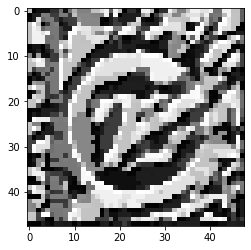

In [8]:
image1 = incorrect[5].reshape(48, 48)
image2 = correct[5].reshape(48, 48)
image = Image.fromarray(image1)
image4 = Image.fromarray(image2)
plt.imshow(image)

In [5]:
print("------ Normal Bayes --------")
clf2 = sk_bayes.BernoulliNB(alpha=1.0,
                            binarize=0.0,
                            fit_prior=True,
                            class_prior=None)
clf2.fit(X_train, y_train)  
acc = []
acc_NB = clf2.score(X_test, y_test)  
acc.append(acc_NB)
y_pred = clf2.predict(X_test)
print(acc)

------ Normal Bayes --------
[0.2973871733966746]


NB


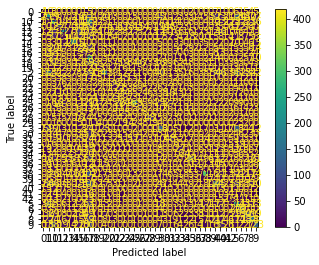

In [6]:
print("NB")
cm2 = metrics.plot_confusion_matrix(clf2, X_test, y_test)  
plt.show()